# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import MultipleLocator
from scipy.spatial.distance import cdist
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Users/Tako/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Tako/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

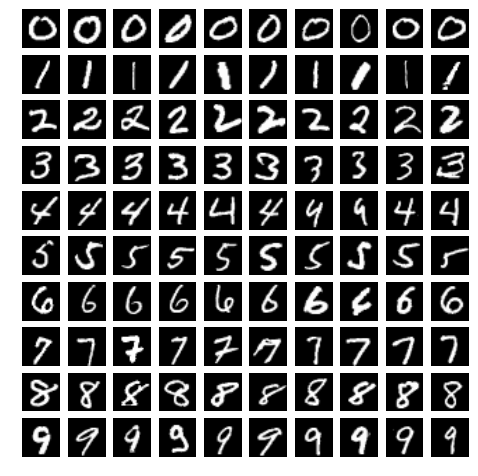

In [281]:
def P1(num_examples=10):

### STUDENT START ###
    # Inner function for checking if all figures have been generated as specified
    def check_complete(count_figures, num_figures):
        for i in range(0,10):
            if figures[i] != num_figures:
                return False

        return True

    # Initialize grid
    fig1 = plt.figure(figsize=(8,8))

    # Initialize multidimentional array for keeping track of figures 
    count_figures = []

    for i in range(0, 10):
        count_figures.append(0)

    for i in range(0, len(X)):   
        cur_label = int(Y[i])

        # If we already have 10 instances of the current figure, skip
        if(count_figures[cur_label] >= num_examples):
            continue

        arr = np.array(X[i]).reshape(28,28)
        count_figures[cur_label] = count_figures[cur_label] + 1
        index = cur_label * num_examples + count_figures[cur_label]
        ax1 = fig1.add_subplot(10,num_examples,index, aspect='equal')
        ax1.set_axis_off()
        ax1.imshow(arr, cmap='gray')

        # Check if we should exit or not
        if check_complete(count_figures, num_examples):
            break

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [278]:
def P2(k_values):

### STUDENT START ###

    # Compute accuracies for all values in k_values
    for k in k_values:
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(mini_train_data, mini_train_labels)
        preds = neigh.predict(dev_data)
        print "k = {} ; accuracy: {:.4}".format(k, np.mean(preds == dev_labels))
        
        # Compute precision, recall and F1 if k=1
        if k == 1:
            print(classification_report(dev_labels, preds))

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k = 1 ; accuracy: 0.888
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

k = 3 ; accuracy: 0.878
k = 5 ; accuracy: 0.869
k = 7 ; accuracy: 0.865
k = 9 ; accuracy: 0.863


ANSWER:

9 seems to be the most difficult digit to predict with the precision of 0.75, recall of 0.85 and F1 score of 0.75. 

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [411]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    # Initialize parameters
    k = 1
    index = 0

    # Instantiate KNeighborsClassifier with k=1
    neigh = KNeighborsClassifier(n_neighbors=k)

    for i in range(0,len(train_sizes)):
        new_index = index+train_sizes[i]
        before_timestamp = time.time()
        neigh.fit(X[index:new_index], Y[index:new_index])
        preds = neigh.predict(dev_data)
        after_timestamp = time.time()
        accuracy = np.mean(preds == dev_labels)
        accuracies.append(accuracy)
        print "k = {} ; training set size: {} time needed for prediction: {:.4} accuracy: {:.4}".format(
            k, train_sizes[i], after_timestamp - before_timestamp, accuracy)
        index = new_index

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

k = 1 ; training set size: 100 time needed for prediction: 0.0878 accuracy: 0.72
k = 1 ; training set size: 200 time needed for prediction: 0.1733 accuracy: 0.776
k = 1 ; training set size: 400 time needed for prediction: 0.3671 accuracy: 0.839
k = 1 ; training set size: 800 time needed for prediction: 0.712 accuracy: 0.868
k = 1 ; training set size: 1600 time needed for prediction: 1.462 accuracy: 0.912
k = 1 ; training set size: 3200 time needed for prediction: 2.942 accuracy: 0.914
k = 1 ; training set size: 6400 time needed for prediction: 5.974 accuracy: 0.952
k = 1 ; training set size: 12800 time needed for prediction: 12.23 accuracy: 0.957
k = 1 ; training set size: 25000 time needed for prediction: 25.01 accuracy: 0.963


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

n = 60000; accuracy: 1.24
Estimated function: y = 0.8406 + 0.00000665x


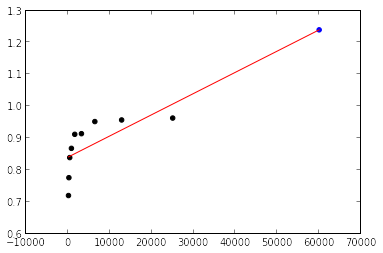

In [420]:
# Inner function for plotting result
def plot_result(n, lr, train_sizes, accuracies, pred):
    # Plot the result
    plt.scatter(train_sizes, accuracies,  color='black')

    # Create a list of values in the best fit line
    abline_values = [lr.coef_[0] * i + lr.intercept_ for i in train_sizes]
    abline_values.append(lr.coef_[0] * n + lr.intercept_)

    # Create an array for plotting result
    train_sizes_plot = np.append(train_sizes, [n])

    # Plot the best fit line over the actual values
    plt.plot(train_sizes_plot, abline_values, color='red')

    # Plot the 
    plt.scatter(n, pred, color='blue')

    plt.show()

def P4():

### STUDENT START ###  

    # Initialize variables
    n = 60000
    
    # Instantiate LinearRegression and train and predict accuracy for n = 60000
    lr = LinearRegression(fit_intercept=True)
    lr.fit(np.array(train_sizes).reshape(-1, 1), accuracies)
    pred = lr.predict(n)
    print "n = {}; accuracy: {:.4}".format(n, pred[0])
    print 'Estimated function: y = %.4f + %.8fx' %(lr.intercept_, lr.coef_[0])

    # Plot the resulting model
    plot_result(n, lr, train_sizes, accuracies, pred)
    
### STUDENT END ###

P4()

ANSWER:

The model predicts the accuracy to be 1.24 when n = 60,000 which is clearly wrong as accuracy cannot exceed 100%.

n = 60000; accuracy: 1.034
Estimated function: y = 0.5601 + 0.04309410x


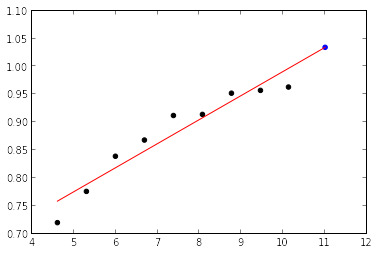

n = 60000; accuracy: 1.013
Estimated function: y = 0.2634 + 0.31239770x


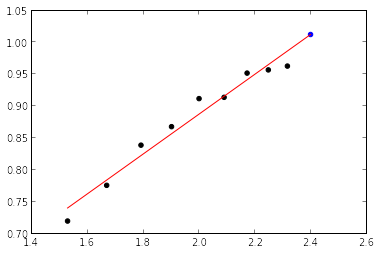

In [431]:
def P4_2():

### STUDENT START ###
    n = 60000
    
    # Create another instance of LinearRegression and fit
    lr2 = LinearRegression(fit_intercept=True)
    lr2.fit(np.array(np.log(train_sizes)).reshape(-1, 1), accuracies)
    pred = lr2.predict(np.log(n))
    print "n = {}; accuracy: {:.4}".format(n, pred[0])
    print 'Estimated function: y = %.4f + %.8fx' %(lr2.intercept_, lr2.coef_[0])
   
    # Plot the resulting model
    plot_result(np.log(n), lr2, np.log(train_sizes), accuracies, pred)

    # Create yet another instance LinearRegression and fit
    lr3 = LinearRegression(fit_intercept=True)
    lr3.fit(np.array(np.log(np.log(train_sizes))).reshape(-1, 1), accuracies)
    pred = lr3.predict(np.log(np.log(n)))
    print "n = {}; accuracy: {:.4}".format(n, pred[0])
    print 'Estimated function: y = %.4f + %.8fx' %(lr3.intercept_, lr3.coef_[0])
   
    # Plot the resulting model
    plot_result(np.log(np.log(n)), lr3, np.log(np.log(train_sizes)), accuracies, pred)
    
### STUDENT END ###

P4_2()

Applying np.log() to train_size makes the end plot more reasonable however the accuracy when n = 60000 still exceeds 1 which cannot be true.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

4 and 9 are the most confused pair of digits with 14 instances of false labels.


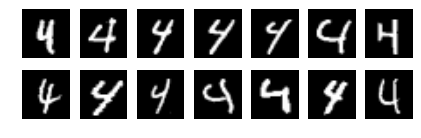

In [287]:
def P5():

### STUDENT START ###
    # Inner function fox finding the max value
    def get_max(cm):
        max_value = 0
        max_i = 0
        max_j = 0
        for i in range(0, 10):
            for j in range(0,10):
                # If i == j then skip as it is true positive
                if i == j:
                    continue

                if cm[i][j] > max_value:
                    max_value = cm[i][j]
                    max_i = i
                    max_j = j

        return max_value, max_i, max_j
    
    # Main routine starts here
    
    # Run KNeighborsClassifier with k=1
    k = 1
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(mini_train_data, mini_train_labels)
    preds = neigh.predict(dev_data)

    # Create a confusion matrix from generated predictions
    cm = confusion_matrix(dev_labels, preds)

    (max_value, max_i, max_j) = get_max(cm)
    print '{} and {} are the most confused pair of digits with {} instances of false labels.'.format(
        max_i, max_j, max_value)

    # Initialize plt
    fig = plt.figure(figsize=(7,2))

    # Initialize count
    count = 0

    # Plot the figures
    for i in range(0, len(preds)):
        if preds[i] == 9 and dev_labels[i] == 4:
            arr = np.array(dev_data[i]).reshape(28,28)
            ax = fig.add_subplot(2, 7, count, aspect='equal')
            ax.set_axis_off()
            ax.imshow(arr, cmap='gray')
            count = count +1
        
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [344]:
def P6():
    
### STUDENT START ###

    # Inner function for getting neighboring pixels
    def get_neighboring_pixels(arr, i, j):
        x_pos = [i-1, i, i+1]
        y_pos = [j-1, j, j+1]
        pixels = []

        if i == 0:
            del(x_pos[0])

        if i == len(arr) - 1:
            del(x_pos[len(x_pos)-1])

        if j == 0:
            del(y_pos[0])

        if j == len(arr) - 1:
            del(y_pos[len(y_pos)-1])

        for x in x_pos:
            for y in y_pos:
                pixels.append(arr[x][y])

        return pixels

    # Inner function for applying gaussian blur to a figure image
    def gaussian_blur(figure):
        arr = np.array(figure).reshape(28,28)
        pixels = []
        for i in range(0, len(arr)):
            new_list = []
            pixels.append(new_list)
            for j in range(0, len(arr[i])):
                pixels[i].append(np.average(get_neighboring_pixels(arr, i, j)))

        return np.ravel(pixels)

    # Apply gaussian blur to the training data
    train_data_gaussian = []

    for figure in train_data:
        train_data_gaussian.append(gaussian_blur(figure))

    # Apply gaussian blur to the dev data   
    dev_data_gaussian = []

    for figure in dev_data:
        dev_data_gaussian.append(gaussian_blur(figure))

    # Now run KNeighborsClassifier with blurred and non-blurred datasets
    # and compare results

    # We will just use k=1 for the comparison
    k=1

    # Gaussian blur NOT applied to both training and dev data
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_data, train_labels)
    preds = neigh.predict(dev_data)
    print "k = {} ; accuracy: {:.4}".format(k, np.mean(preds == dev_labels))

    # Gaussian blur applied to training data but NOT dev data
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_data_gaussian, train_labels)
    preds = neigh.predict(dev_data)
    print "k = {} ; accuracy: {:.4}".format(k, np.mean(preds == dev_labels))

    # Gaussian blur applied to dev data but NOT training data
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_data, train_labels)
    preds = neigh.predict(dev_data_gaussian)
    print "k = {} ; accuracy: {:.4}".format(k, np.mean(preds == dev_labels))

    # Gaussian blur applied to both training and dev data
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_data_gaussian, train_labels)
    preds = neigh.predict(dev_data_gaussian)
    print "k = {} ; accuracy: {:.4}".format(k, np.mean(preds == dev_labels))
    
### STUDENT END ###

P6()

k = 1 ; accuracy: 0.977
k = 1 ; accuracy: 0.982
k = 1 ; accuracy: 0.962
k = 1 ; accuracy: 0.979


ANSWER:

There is no significant difference observed in accuracy between when we used blurred training/dev datasets and non-blurred datasets.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [288]:
def P7():

### STUDENT START ###

    # Define a function that applies a threshold to turn real valued figure features into 0/1 features.
    # 0 will mean "empty" and 1 will mean "not empty".
    def binarize_data(data, threshold):
        # Initialize a new feature array with the same shape as the original data.
        binarized_data = np.zeros(data.shape)

        # Apply a threshold
        for column in range(data.shape[1]):
            binarized_data[:,column] = data[:,column] > threshold
        return binarized_data

    # Define binary threshhold to be 0
    binary_threshhold = 0

    # Binarize training and dev data
    train_data_binarized = binarize_data(train_data, binary_threshhold)
    dev_data_binarized = binarize_data(dev_data, binary_threshhold)

    # Fit BernoulliNB and report accuracy
    clf = BernoulliNB()
    clf.fit(train_data_binarized, train_labels)
    preds = clf.predict(dev_data_binarized)
    print "k = {} ; accuracy: {:.4}".format(k, np.mean(preds == dev_labels))

### STUDENT END ###

P7()

k = 1 ; accuracy: 0.826


Now we want to map the pixel values to 0, 1, or 2, representing white, grey, or black. Let's look at the distribution of colored pixels in our training data and their values to determine thresholds.

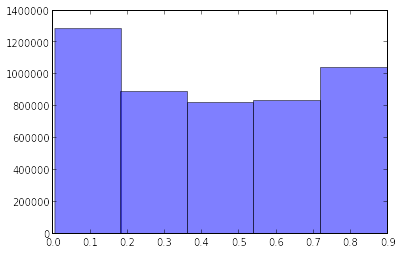

In [75]:
arr = []

for figure in train_data:
    for pixel in figure:
        if pixel > 0 and pixel < 0.9:
            arr.append(pixel)     
num_bins = 5
n, bins, patches = plt.hist(arr, num_bins, facecolor='blue', alpha=0.5)
plt.show()

Excluding values > 0.9 which are essentially black, the values are more or less uniformly distributed between 0 and 0.9. Based on this, we will define our thresholds to be evenly split between 0 and 1 [1/3, 2/3 and 1].

In [292]:
def P7_2(map_thresholds, threshold_values):

### STUDENT START ###

    # Define function for assigning values by thresholds
    def map_data(data, thresholds, threshold_values):
        mapped_data = np.where(
            (data > thresholds[0]) & (data < thresholds[1]), threshold_values[1],
            np.where(
                (data >= thresholds[1]) & (data <= thresholds[2]), threshold_values[2], threshold_values[0]
            )
        )

        return mapped_data

    # Label training and dev data
    train_data_mapped = map_data(train_data, map_thresholds, threshold_values)
    dev_data_mapped = map_data(dev_data, map_thresholds, threshold_values)

    # Fit MultinomialNB and report accuracy
    clf = MultinomialNB()
    clf.fit(train_data_mapped, train_labels)
    preds = clf.predict(dev_data_mapped)
    print "k = {} ; accuracy: {:.4}".format(k, np.mean(preds == dev_labels))

### STUDENT END ###

# Define threshholds
map_thresholds = [1.0/3.0, 2.0/3.0, 1]
threshold_values = [0, 1, 2]

P7_2(map_thresholds, threshold_values)

k = 1 ; accuracy: 0.825


ANSWER:

The accuracy of MultinomialNB is 0.825 which is slightly lower than that of BernoulliNB (0.826). I would have expected multi-class version would perform better with the availability of an additional class helping the model better-identify each target figure however it appears it did not make much difference.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [295]:
def P8(alphas):

### STUDENT START ###

    # Use GridSearchCV to determine the best alpha value
    nb = BernoulliNB()
    param_searcher = GridSearchCV(nb, alphas)
    param_searcher.fit(train_data_binarized, train_labels)

    print "Best Alpha Value: {} Best Score: {:.4}".format(param_searcher.best_params_, param_searcher.best_score_)
    
    # Re-run BernoulliNB with alpha=0 and report accuracy
    nb = BernoulliNB(alpha=0)
    nb.fit(train_data_binarized, train_labels)
    preds = nb.predict(dev_data_binarized)
    print "k = {} ; accuracy: {:.4}".format(k, np.mean(preds == dev_labels))
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

Best Alpha Value: {'alpha': 0.0} Best Score: 0.8335
k = 1 ; accuracy: 0.829


ANSWER:

Accuracy is 0.829 when alpha is 0 which is slightly lower than the best score we see from GridSearchCV.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [296]:
def P9():

### STUDENT END ###

    # Train GaussianNB with the training data given
    # and report accuracy as well as its theta and sigma
    nb = GaussianNB()
    nb.fit(train_data, train_labels)
    preds = nb.predict(dev_data)
    print "k = {} ; accuracy: {:.4}".format(k, np.mean(preds == dev_labels))
    print "theta: {}".format(nb.theta_)
    print "sigma: {}".format(nb.sigma_)

    # nb.sigma_ which indicates the variance variance of each feature per class is small
    # We will try to increase it by simply adding an arbitrary number.

    # Assign a larger value to sigma to increase variance
    sig = (nb.sigma_ * 0) + 2

    # Create another instance of GaussianNB amd set sigma_ to sig and report accuracy
    nb_2 = GaussianNB()
    nb_2.fit(train_data, train_labels)
    nb_2.sigma_ = sig
    preds = nb_2.predict(dev_data)
    print "k = {} ; accuracy: {:.4}".format(k, np.mean(preds == dev_labels))
    
    return nb_2

### STUDENT END ###

gnb = P9()

k = 1 ; accuracy: 0.571
theta: [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
sigma: [[  1.99394972e-10   1.99394972e-10   1.99394972e-10 ...,   1.99394972e-10
    1.99394972e-10   1.99394972e-10]
 [  1.99394972e-10   1.99394972e-10   1.99394972e-10 ...,   1.99394972e-10
    1.99394972e-10   1.99394972e-10]
 [  1.99394972e-10   1.99394972e-10   1.99394972e-10 ...,   1.99394972e-10
    1.99394972e-10   1.99394972e-10]
 ..., 
 [  1.99394972e-10   1.99394972e-10   1.99394972e-10 ...,   1.99394972e-10
    1.99394972e-10   1.99394972e-10]
 [  1.99394972e-10   1.99394972e-10   1.99394972e-10 ...,   1.99394972e-10
    1.99394972e-10   1.99394972e-10]
 [  1.99394972e-10   1.99394972e-10   1.99394972e-10 ...,   1.99394972e-10
    1.99394972e-10   1.99394972e-10]]
k = 1 ; accuracy: 0.81


ANSWER:

Adding 2 to sigma_ brought up the accuracy to 81%.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

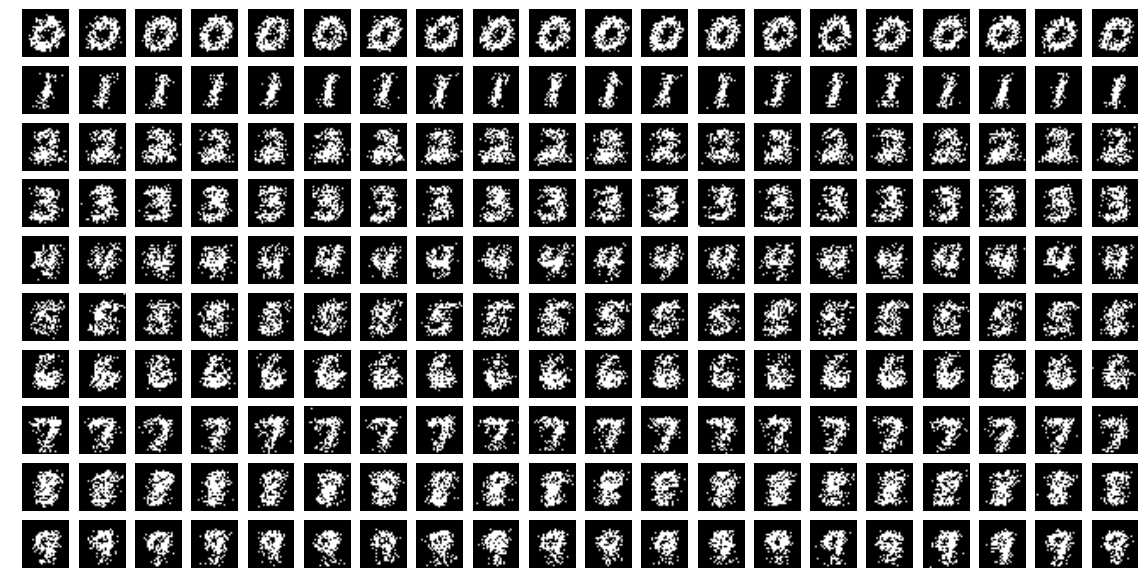

In [343]:
def P10(num_examples):

### STUDENT START ###

    # Inner function for generating a figure
    def generate_figure(prob):
        rand = np.random.rand(784)
        rand[rand <= prob] = 1
        rand[rand != 1] = 0
        
        return rand

    # Instantiate BernoulliNB
    clf = BernoulliNB()
    clf.fit(train_data_binarized, train_labels)
    probs = np.exp(clf.feature_log_prob_)

    # Initialize grid
    fig = plt.figure(figsize=(20, 10))
    
    # Now print the figures
    for i in range(0, 10):
        for j in range(0, num_examples):
            arr = np.array(generate_figure(probs[i])).reshape(28,28)
            index = i * num_examples + j + 1
            ax = fig.add_subplot(10, num_examples, index, aspect='equal')
            ax.set_axis_off()
            ax.imshow(arr, cmap='gray')

### STUDENT END ###

P10(20)

ANSWER:

The generated digits are considerably more blurry compared to the training digits. Although most of the figures are legible despite the increased blurriness, the ones with more indents and curves such as 5 and 8 are difficult to make out.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

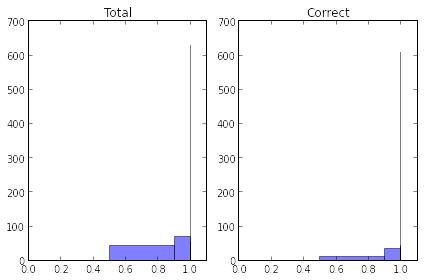

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  42    accuracy = 0.262
p(pred) <= 0.9990000000000    total =  70    accuracy = 0.500
p(pred) <= 0.9999900000000    total =  51    accuracy = 0.549
p(pred) <= 0.9999999000000    total =  54    accuracy = 0.667
p(pred) <= 0.9999999990000    total =  49    accuracy = 0.531
p(pred) <= 0.9999999999900    total =  52    accuracy = 0.788
p(pred) <= 0.9999999999999    total =  53    accuracy = 0.830
p(pred) <= 1.0000000000000    total = 629    accuracy = 0.967


In [555]:
def P11(buckets, correct, total):
    
### STUDENT START ###
  
    # Instantiate BernoulliNB with the best computed alpha value earlier
    nb = BernoulliNB(alpha=param_searcher.best_params_['alpha'])
    nb.fit(train_data_binarized, train_labels)
    preds = nb.predict(dev_data_binarized)
    probs = nb.predict_proba(dev_data_binarized)

    # Initialize lists for storing results
    max_probs = []
    correct_arr = []
    
    # Get the max probability for each prediction    
    for i in range(0, len(preds)):
        max_probs.append(max(probs[i]))
        
        # If the prediction is correct, store it
        if preds[i] == dev_labels[i]:
            correct_arr.append(max(probs[i]))
   
    # We need to add 0 at the beginning of buckets to cover the range (0, 0.5]
    buckets_arr = np.append([0], buckets) 

    # Prepare plotting histograms
    fig, axes = plt.subplots(ncols=2, sharex=True)
    plt.xlim(0, 1.1)
    ax0, ax1 = axes.flatten()
    
    total_num, bins, patches = ax0.hist(max_probs, buckets_arr, facecolor='blue', alpha=0.5)
    ax0.set_title('Total')
    
    # Need to manually set the values back to total
    for i in range(0, len(total)):
        total[i] = float(total_num[i])
    
    correct_num, bins, patches = ax1.hist(correct_arr, buckets_arr, facecolor='blue', alpha=0.5)
    ax1.set_title('Correct')
    
    # Need to manually set the values back to correct
    for i in range(0, len(correct)):
        correct[i] = float(correct_num[i])
    
    fig.tight_layout()
    plt.show()
    
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

ANSWER:

Based on the results, we can conclude that the classifier is weakly calibrated as the classifier becomes more accurate when the posterior is 90% than when it is 80%. However we can say it is not necessarily poorly calibrated as we can observe there is a positive correlation between posterior and accuracy.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()